<a href="https://colab.research.google.com/github/tomas655/Proyectos-ACAMICA/blob/master/tomas_de_anchorena_DS_Proyecto_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 04 - Informe Final de Carrera (Data Science)

Profundiza y ajusta la resolución de tus proyectos: agrega al menos una fuente de datos o prueba un modelo que hasta el momento no hayas aplicado. Elabora un informe ?nal que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder

Te presentamos los pasos a seguir para realizar el proyecto 04.

1- Elige tu punto de partida entre dos opciones:
Tus Proyectos 01 y 02
Tu Proyecto 03
Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

2- Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

3- Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

4- Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

5- Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.

6- Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
data_2019 = pd.read_csv('/content/drive/My Drive/ACAMICA/Datasets/flujo-vehicular-2019.csv', sep =',') #http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2019.csv
data_2018 = pd.read_csv('/content/drive/My Drive/ACAMICA/Datasets/flujo-vehicular-2018.csv', sep =',') #http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2018.csv
data_2017 = pd.read_csv('/content/drive/My Drive/ACAMICA/Datasets/flujo-vehicular-2017.csv', sep =',') #http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2017.csv

In [151]:
#data_2019 = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2019.csv', sep =',') #
#data_2018 = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2018.csv', sep =',') #
#data_2017 = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/flujo-vehicular-por-unidades-de-peaje-ausa/flujo-vehicular-2017.csv', sep =',') #

In [152]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [153]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [154]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [155]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [156]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [157]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [158]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [159]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_original = dataset
dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [160]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [161]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [162]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [163]:
dataset = dataset.set_index('fecha')

In [164]:
dataset.reset_index()


,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Provincia,Pesado,1
1,2017-01-01 00:00:00,Domingo,Provincia,Liviano,9
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,644
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,6
4,2017-01-01 00:00:00,Domingo,Provincia,Pesado,1
...,...,...,...,...,...
238864,2019-12-31 22:00:00,Martes,Provincia,Liviano,556
238865,2019-12-31 22:00:00,Martes,Provincia,Pesado,1
238866,2019-12-31 22:00:00,Martes,Centro,Liviano,580
238867,2019-12-31 23:00:00,Martes,Centro,Liviano,214


In [165]:
dataset['fecha']=dataset.index
dataset['hora'] = dataset['fecha'].dt.hour
dataset['dayofweek'] = dataset['fecha'].dt.dayofweek
dataset['trimestre'] = dataset['fecha'].dt.quarter
dataset['mes'] = dataset['fecha'].dt.month
dataset['año'] = dataset['fecha'].dt.year
dataset['dayofyear'] = dataset['fecha'].dt.dayofyear
dataset['dayofmonth'] = dataset['fecha'].dt.day
dataset['weekofyear'] = dataset['fecha'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



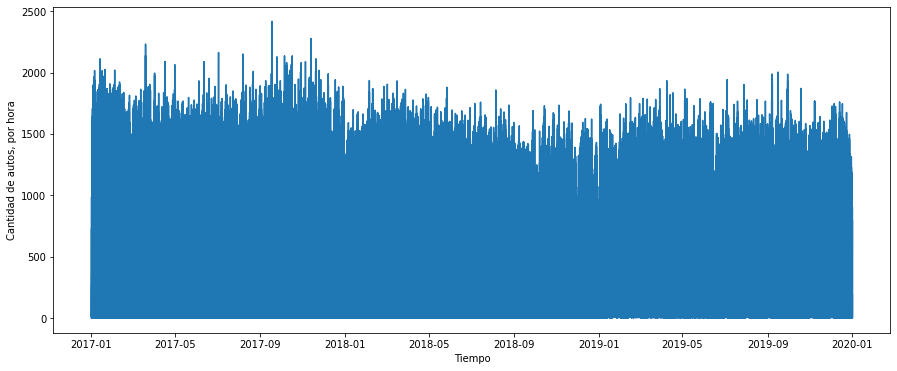

In [166]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [167]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 9)


,cantidad_pasos,hora,dayofweek,trimestre,mes,año,dayofyear,dayofmonth,weekofyear
fecha,,,,,,,,,
2017-01-01,31183,2976,1386,231,231,465927,231,231,12012
2017-01-02,51568,3713,0,316,316,637372,632,632,316
2017-01-03,51093,3573,307,307,307,619219,921,921,307
2017-01-04,53332,3909,642,321,321,647457,1284,1284,321
2017-01-05,56486,3820,954,318,318,641406,1590,1590,318


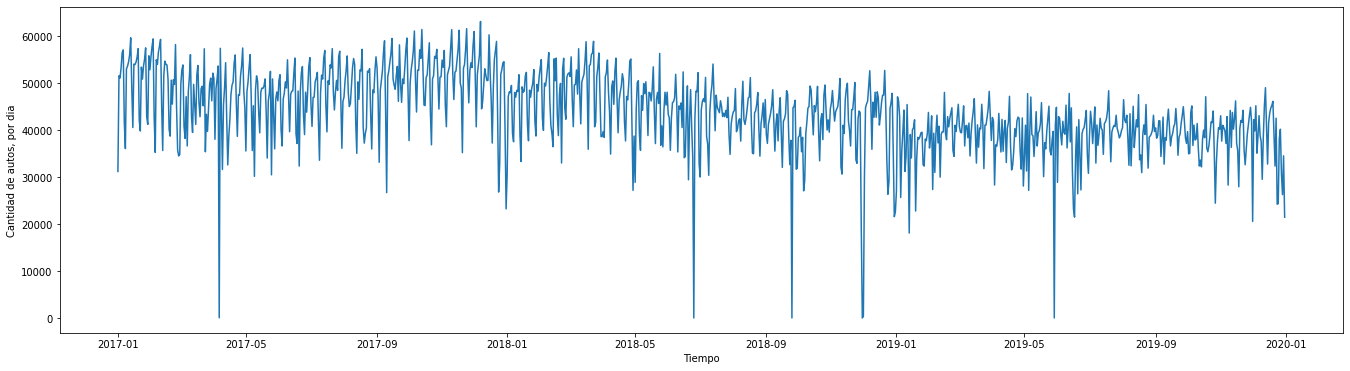

In [168]:
plt.figure(figsize = (23,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## Exploración de Datos

El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.

Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.

Preguntas a responder es: **A que corresponden los Outliers?, Cual es el dia  y el horario con mas trafico?**

In [169]:
diarioillia = dataset.resample('D', on = 'fecha').sum()
#diarioillia.drop(['hora','dayofweek','trimestre','mes','año','dayofyear','dayofmonth','weekofyear'],axis=1,inplace=True)
diarioillia.reset_index()

,fecha,cantidad_pasos,hora,dayofweek,trimestre,mes,año,dayofyear,dayofmonth,weekofyear
0,2017-01-01,31183,2976,1386,231,231,465927,231,231,12012
1,2017-01-02,51568,3713,0,316,316,637372,632,632,316
2,2017-01-03,51093,3573,307,307,307,619219,921,921,307
3,2017-01-04,53332,3909,642,321,321,647457,1284,1284,321
4,2017-01-05,56486,3820,954,318,318,641406,1590,1590,318
...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,40182,1104,384,384,1152,193824,34656,2592,4992
1091,2019-12-28,30681,1104,480,384,1152,193824,34752,2688,4992
1092,2019-12-29,26259,1104,576,384,1152,193824,34848,2784,4992
1093,2019-12-30,34523,1101,0,380,1140,191805,34580,2850,95


In [170]:
aut_2017=diarioillia.loc['2017-01-01':'2017-12-31']
aut_2018=diarioillia.loc['2018-01-01':'2018-12-31']
aut_2019=diarioillia.loc['2019-01-01':'2019-12-31']

In [171]:
print(f'Cantidad de registros por año:\n2017: {aut_2017.cantidad_pasos.sum()}\n2018: {aut_2018.cantidad_pasos.sum()}\n2019: {aut_2019.cantidad_pasos.sum()}')

Cantidad de registros por año:
2017: 17783512
2018: 15966944
2019: 14115125


- Se observa una disminucion anual en la cantidad de pases de vehiculos, seguramente por el aumento del **'telepase'** y la digitalizacion 


- A continuacion voy a estudiar los registros que estan en 0 y ver si hay correlacion con feriados en Argentina

In [172]:
# importo 3 listas con los feriadoes en Argentina de los 3 anios en estudio
 
holidays2017=['2017-01-01','2017-02-27','2017-02-28','2017-03-28','2017-04-02','2017-04-13','2017-04-14','2017-05-01','2017-06-17','2017-06-20','2017-07-09','2017-08-17','2017-10-12','2017-11-20','2017-12-08','2017-12-25']
holidays2018=['2018-01-01','2018-02-12','2018-02-13','2018-03-24','2018-03-30','2018-04-02','2018-04-30','2018-05-01','2018-05-25','2018-06-17','2018-06-20','2018-07-09','2018-08-20','2018-10-15','2018-11-19','2018-12-08','2018-12-24','2018-12-25','2018-12-31']
holidays2019=['2019-01-01','2019-03-04','2019-03-05','2019-03-24','2019-04-02','2019-04-18','2019-04-19','2019-05-01','2019-05-25','2019-06-17','2019-06-20','2019-07-08','2019-07-09','2019-08-17','2019-08-19','2019-10-12','2019-10-14','2019-11-18','2019-12-08','2019-12-25']

In [173]:
import plotly.graph_objects as go
import plotly.express as px

fig1 = px.line(aut_2017, x=aut_2017.index, y='cantidad_pasos',title='Cantidad de autos en 2017 para la autopista Illia')

fig1.add_trace(go.Scatter(x=holidays2017, y=aut_2017.loc[holidays2017].cantidad_pasos,
                    mode='markers', name='Feriados'))
fig1.update_layout(xaxis_title='Días 2017',
                   yaxis_title='Cantidad de automóviles')
fig1.update_xaxes(nticks=100,showgrid=False)
fig1.show()

fig2 = px.line(aut_2018, x=aut_2018.index, y='cantidad_pasos',title='Cantidad de autos en 2018 para la autopista Illia')
fig2.add_trace(go.Scatter(x=holidays2018, y=aut_2018.loc[holidays2018].cantidad_pasos,
                    mode='markers', name='Feriados'))
fig2.update_layout(xaxis_title='Días 2018',
                   yaxis_title='Cantidad de automóviles')
fig2.update_xaxes(nticks=100,showgrid=False)
fig2.show()

fig3 = px.line(aut_2019, x=aut_2019.index, y='cantidad_pasos',title='Cantidad de autos en 2019 para la autopista Illia')
fig3.add_trace(go.Scatter(x=holidays2019, y=aut_2019.loc[holidays2019].cantidad_pasos,
                    mode='markers', name='Feriados'))
fig3.update_layout(xaxis_title='Días 2019',
                   yaxis_title='Cantidad de automóviles')
fig3.update_xaxes(nticks=100,showgrid=False)
fig3.show()

Los feriados nacionales se muestran con los puntos rojos y claramente producen una disminución en el flujo de automóviles. Ademas se observan otros picos de bajo transito que pueden llegar a tratarse de dias domingos, vacaciones, paros nacionales, piquetes, obras viales u otros factores tipicos argentinos.

In [174]:
out2017=aut_2017[aut_2017['cantidad_pasos']<27000]
print(out2017)

            cantidad_pasos  hora  dayofweek  ...  dayofyear  dayofmonth  weekofyear
fecha                                        ...                                   
2017-04-06              40     3          9  ...        288          18          42
2017-09-10           26684  2663       1248  ...      52624        2080        7488
2017-12-24           26805  2277       1230  ...      73390        4920       10455
2017-12-31           23229  2277       1200  ...      73000        6200       10400

[4 rows x 9 columns]


El 6 de Abril de 2017 hubo un paro nacional.

El 9 de Octubre de 2017 fue Domingo, puede ser un factor determinante para la disminución de automóviles en las autopistas.

El 24 y 31 de Diciembre son días festivos y atípicos en cuanto a la cantidad de automóviles circulando en las autopistas.

In [175]:
out2018=aut_2018[aut_2018['cantidad_pasos']<25000]
print(out2018)

            cantidad_pasos  hora  dayofweek  ...  dayofyear  dayofmonth  weekofyear
fecha                                        ...                                   
2018-06-25               0     0          0  ...          0           0           0
2018-09-25               0     0          0  ...          0           0           0
2018-11-29           19728  1870        576  ...      63936        5568        9216
2018-11-30               0     0          0  ...          0           0           0
2018-12-01             350    92         55  ...       3685          11         528
2018-12-30           21559  2102        930  ...      56420        4650        8060
2018-12-31           22599  2213          0  ...      72270        6138         198

[7 rows x 9 columns]


El 25 de Junio de 2018 hubo paro nacional.

El 25 de Septiembre de 2018 hubo paro nacional.

El 29 de Noviembre fue el comienzo del G20 en Argentina.

El 30 de Noviembre y el 1 de diciembre se decreta feriado en CABA por la celebración de la Cumbre de Líderes del Grupo de los 20 en la ciudad.

El 24, 30 y 31 de Diciembre son días festivos y atípicos en cuanto a la cantidad de automóviles circulando en las autopistas.

In [176]:
out2019=aut_2019[aut_2019['cantidad_pasos']<22000]
print(out2019)

            cantidad_pasos  hora  dayofweek  ...  dayofyear  dayofmonth  weekofyear
fecha                                        ...                                   
2019-01-13           18076   781        360  ...        780         780         120
2019-05-29               0     0          0  ...          0           0           0
2019-06-17           21469  1099          0  ...      15960        1615        2375
2019-12-01           20553   624        384  ...      21440          64        3072
2019-12-31           21447  1034         89  ...      32485        2759          89

[5 rows x 9 columns]



No existió ningún hecho relevante que explique la disminución en la cantidad de personas que se registró el 13 de Enero. Una posible razón podría ser las vacaciones de verano, sumado a que fue Domingo.

El 29 de Mayo hubo paro nacional.

El 17 de Junio fue feriado Nacional, conmemorando la muerte del General Martín Miguel de Guemes.
No existió ningún hecho relevante que explique la disminución en la cantidad de personas que se registró el 1 de Diciembre. Una posible razón podría ser que fue Domingo.

El 31 de Diciembre es día festivo y atípico en cuanto a la cantidad de automóviles circulando en las autopistas
Si bien existen días en 0, no imputaré su valor ya que es sólo para la forma de pago "efectivo". 

Al tomar la totalidad de las formas de pago y de estaciones, se puede notar que existen datos para las otras opciones, por lo que no me parece necesario realizar ninguna imputación.

- A continuacion voy a contestar la pregunta formulada sobre que dia y horarios son los mas concurridos.

In [177]:
# Creo variables para los dias
lunes=dataset[dataset['dia']=='Lunes']
martes=dataset[dataset['dia']=='Martes']
miercoles=dataset[dataset['dia']=='Miércoles']
jueves=dataset[dataset['dia']=='Jueves']
viernes=dataset[dataset['dia']=='Viernes']
sabado=dataset[dataset['dia']=='Sábado']
domingo=dataset[dataset['dia']=='Domingo']

In [178]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,hora,dayofweek,trimestre,mes,año,dayofyear,dayofmonth,weekofyear
fecha,,,,,,,,,,,,,
2017-01-01 00:00:00,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 00:00:00,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 00:00:00,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 00:00:00,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 00:00:00,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:00:00,Martes,Provincia,Liviano,556,2019-12-31 22:00:00,22,1,4,12,2019,365,31,1
2019-12-31 22:00:00,Martes,Provincia,Pesado,1,2019-12-31 22:00:00,22,1,4,12,2019,365,31,1
2019-12-31 22:00:00,Martes,Centro,Liviano,580,2019-12-31 22:00:00,22,1,4,12,2019,365,31,1


In [179]:
phlunes = lunes.groupby(['hora'])['cantidad_pasos'].sum()   #VER HORASSSS
phmart = martes.groupby(['hora'])['cantidad_pasos'].sum()
phmierc=miercoles.groupby(['hora'])['cantidad_pasos'].sum()
phjuev=jueves.groupby(['hora'])['cantidad_pasos'].sum()
phvier=viernes.groupby(['hora'])['cantidad_pasos'].sum()
phsab=sabado.groupby(['hora'])['cantidad_pasos'].sum()
phdom=domingo.groupby(['hora'])['cantidad_pasos'].sum()

In [180]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=phlunes,
                    mode='lines',
                    name='lunes'))
fig.add_trace(go.Scatter(y=phmart,
                    mode='lines',
                    name='martes'))
fig.add_trace(go.Scatter(y=phmierc,
                    mode='lines',
                    name='miercoles'))
fig.add_trace(go.Scatter(y=phjuev,
                    mode='lines',
                    name='jueves'))
fig.add_trace(go.Scatter(y=phvier,
                    mode='lines',
                    name='viernes'))
fig.add_trace(go.Scatter(y=phsab,
                    mode='lines',
                    name='sabado'))
fig.add_trace(go.Scatter(y=phdom,
                    mode='lines',
                    name='domingo'))
fig.update_layout(title='Cantidad de automóviles que cruzan el telepeaje por día y por hora (total 2017,2018 y 2019)',
                   xaxis_title='Hora del día',
                   yaxis_title='Cantidad de automóviles')
fig.update_xaxes(nticks=24,showgrid=False)
fig.show()

Conclusiones del grafico:
- El viernes es el día con mayor cantidad de tránsito.
- En días laborales (lun a vier), existen 'horas pico' en la autopista:
Por la mañana a las 8 y 9 hs. Durante la tarde, los picos máximos se dan a las 13 y 16 hs. En la denominada 'vuelta a casa' se dan otros picos de circulación entre 18 y 19 hs.
- Sábados y Domingos disminuye notablemente la cantidad de vehiculos en circulacion. Se nota un pico entre 13 y 14 hs y a las 19 hs el domingo.

In [181]:
direc=dataset.groupby(['hora','sentido'])[('cantidad_pasos')].sum().reset_index(name='cantidad_pasos')
direc=pd.DataFrame(direc)

Text(0.5, 1.0, 'Sentido del flujo vehicular según horario')

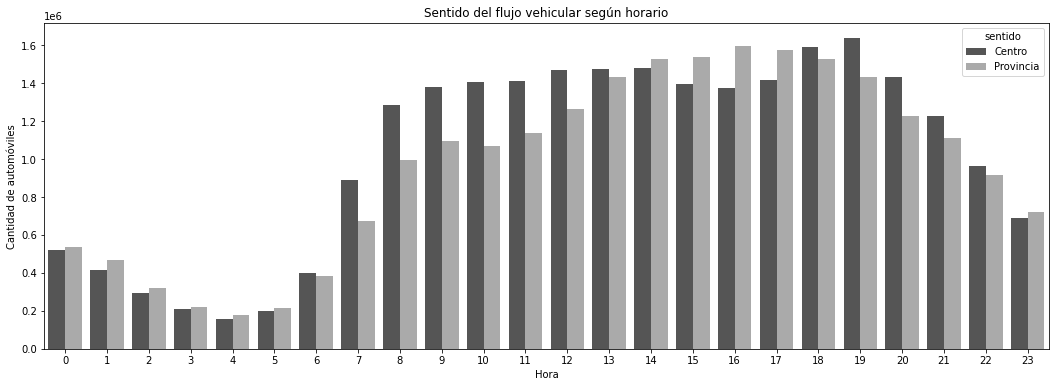

In [182]:
plt.figure(figsize=(18,6))
sns.barplot(data=direc, x='hora',y='cantidad_pasos',hue='sentido', palette='gray')
plt.xlabel('Hora')
plt.ylabel('Cantidad de automóviles')
plt.title('Sentido del flujo vehicular según horario')

- Se nota una marcada diferencia entre la cantidad de autos saliendo e ingresando a Capital Federal.
- Este gráfico me permite afirmar que existe una mayor cantidad de automóviles que se mueven desde Provincia hacia Capital Federal al comienzo del dia laboral y al terminar la tendencia se invierte. Aunque se mantiene un flujo constante elevado desde las 7-8 hs a 21-22 hs.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



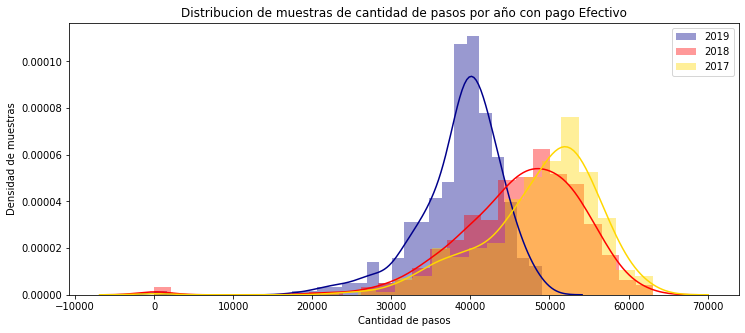

In [183]:
# Análisis de la forma de pago EFECTIVO por año 

plt.figure(figsize = (12,5))
sns.distplot(diario.cantidad_pasos[diario.index>='2019'], color='darkblue',hist=True, label='2019')
sns.distplot(diario.cantidad_pasos[(diario.index<'2019')&(diario.index>'2017')], color='red',hist=True, label='2018')
sns.distplot(diario.cantidad_pasos[diario.index<='2018'], color='gold',hist=True, label='2017')
plt.legend()
plt.xlabel('Cantidad de pasos')
plt.ylabel('Densidad de muestras')
plt.title('Distribucion de muestras de cantidad de pasos por año con pago Efectivo')
plt.show()


Puedo notar que la distribucion se va desplazando hacia la izquierda a medida que transcurren los años.

El pago en efectivova decreciendo desde 2017 a 2019.

A continuacion voy a analizar la tendencia de la serie para poder confirmar este análisis de los histogramas por año. Ademas resampleo la serie por semana para calcular mediante Rolling Window la tendencia.

#### Tratamiento de Outliers

In [184]:
dataset = dataset_original

In [185]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [186]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
#dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
#dataset.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
#dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#dataset.head()

In [187]:
# Orden de dataset por fecha
from sklearn import preprocessing
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
print(dataset.sentido.unique())
print(dataset.tipo_vehiculo.unique())

['Provincia' 'Centro']
['Pesado' 'Liviano']


Se observa que los valores de sentido y tipo vehículo son variables categóricas por lo cual  voy a convertirlas en variables numéricas en base a cantidad de vehículos. Realizo Label Encoding 0 o 1 según corresponda con la selección:

Feature: sentido

Provincia = 1
Centro = 0

Feature: tipo_vehiculo

Pesado = 1
Liviano = 0

Ademas, cuando hay 1 (sentido provincia y vehículo pesado) multiplico antidad_pasos por el 1 del Encoding y obtengo la cantidad de vehículos que circularon hacia provincia que sean pesado.

In [188]:
labelencoding = preprocessing.LabelEncoder()
labelencoding.fit(["Provincia", "Centro"])
dataset['cantidad_sentido_provincia']=dataset['cantidad_pasos']*labelencoding.transform(dataset[['sentido']].values.ravel())
labelencoding = preprocessing.LabelEncoder()
labelencoding.fit(["Pesado", "Liviano"])
dataset['cantidad_pesado']=dataset['cantidad_pasos']*labelencoding.transform(dataset[['tipo_vehiculo']].values.ravel())
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,cantidad_sentido_provincia,cantidad_pesado
0,Domingo,Provincia,Pesado,1,2017-01-01,1,1
1,Domingo,Provincia,Liviano,9,2017-01-01,9,0
2,Domingo,Provincia,Liviano,644,2017-01-01,644,0
3,Domingo,Provincia,Pesado,6,2017-01-01,6,6
4,Domingo,Provincia,Pesado,1,2017-01-01,1,1


In [189]:
#Resampleo datos para agrupar por dia
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 3)


,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado
fecha,,,
2017-01-01,31183,14132,542
2017-01-02,51568,23743,2589
2017-01-03,51093,23526,2771
2017-01-04,53332,24383,2751
2017-01-05,56486,25666,2864


In [190]:
diario['cantidad_liviano']=diario['cantidad_pasos']-diario['cantidad_pesado']
diario['cantidad_sentido_centro']=diario['cantidad_pasos']-diario['cantidad_sentido_provincia']
diario.head()

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
fecha,,,,,
2017-01-01,31183,14132,542,30641,17051
2017-01-02,51568,23743,2589,48979,27825
2017-01-03,51093,23526,2771,48322,27567
2017-01-04,53332,24383,2751,50581,28949
2017-01-05,56486,25666,2864,53622,30820


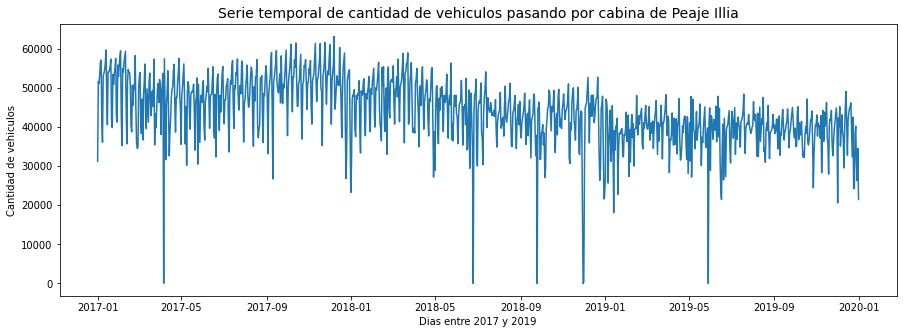

In [191]:
# Grafico
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Dias entre 2017 y 2019')
plt.ylabel('Cantidad de vehiculos')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia', fontsize=14)
plt.show()

In [192]:
diario.cantidad_pasos[diario.cantidad_pasos<20000]

fecha
2017-04-06       40
2018-06-25        0
2018-09-25        0
2018-11-29    19728
2018-11-30        0
2018-12-01      350
2019-01-13    18076
2019-05-29        0
Name: cantidad_pasos, dtype: int64

In [193]:
diario.describe()

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,43712.859361,21149.054795,1394.568037,42318.291324,22563.804566
std,8192.736927,3934.687471,636.171036,7659.024427,4416.781097
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39061.500000,18852.500000,876.000000,38058.500000,20059.000000
50%,43761.000000,21351.000000,1361.000000,42360.000000,22296.000000
75%,49498.000000,23915.000000,1909.000000,47626.000000,25705.500000
max,63127.000000,30458.000000,2983.000000,60748.000000,32669.000000



Los features que tienen valor min = 0 y se encuentran muy distantes del valor del cuartil 25%, me dice que son valores atípicos.
A continuacion mediante rango intercuantilico elimino los Outliers

In [194]:
modelos=['cantidad_pasos', 'cantidad_sentido_provincia','cantidad_liviano','cantidad_sentido_centro']
for i, model in enumerate(['cantidad_pasos', 'cantidad_sentido_provincia',
                           'cantidad_liviano','cantidad_sentido_centro']):
    q25,q75 = np.nanpercentile(diario[model], [25,75])
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    print('\033[1m'+f'Feature: {modelos[i]}'+'\033[0;0m')
    print('Cuartil 25:',q25,'Cuartil 75:',q75,'Valor IQR:',iqr,'Valor minimo:', minimo,
          'Valor maximo:', maximo)
    mascara_outliers = ((diario[model] < minimo) | (diario[model]> maximo))
    diario[mascara_outliers]=np.NaN
diario=diario.interpolate()

Feature: cantidad_pasos
Cuartil 25: 39061.5 Cuartil 75: 49498.0 Valor IQR: 10436.5 Valor minimo: 23406.75 Valor maximo: 65152.75
Feature: cantidad_sentido_provincia
Cuartil 25: 18959.5 Cuartil 75: 23945.5 Valor IQR: 4986.0 Valor minimo: 11480.5 Valor maximo: 31424.5
Feature: cantidad_liviano
Cuartil 25: 38218.75 Cuartil 75: 47739.0 Valor IQR: 9520.25 Valor minimo: 23938.375 Valor maximo: 62019.375
Feature: cantidad_sentido_centro
Cuartil 25: 20127.0 Cuartil 75: 25732.0 Valor IQR: 5605.0 Valor minimo: 11719.5 Valor maximo: 34139.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



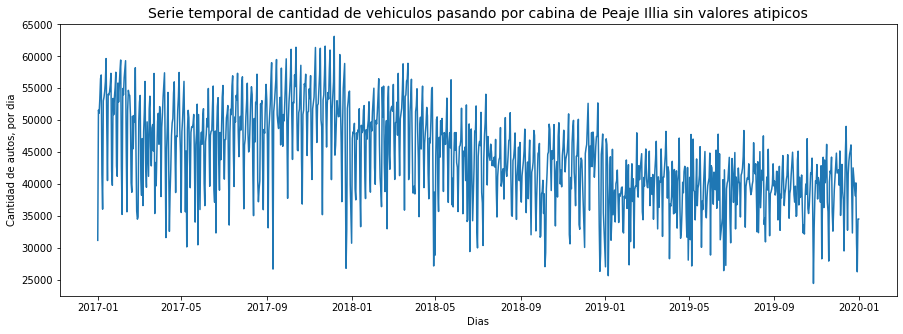

In [195]:
plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_pasos,palette='bright')
plt.xlabel('Dias')
plt.ylabel('Cantidad de autos, por dia')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia sin valores atipicos', fontsize=14)
plt.show()

Claramente se ve una reduccion de los Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



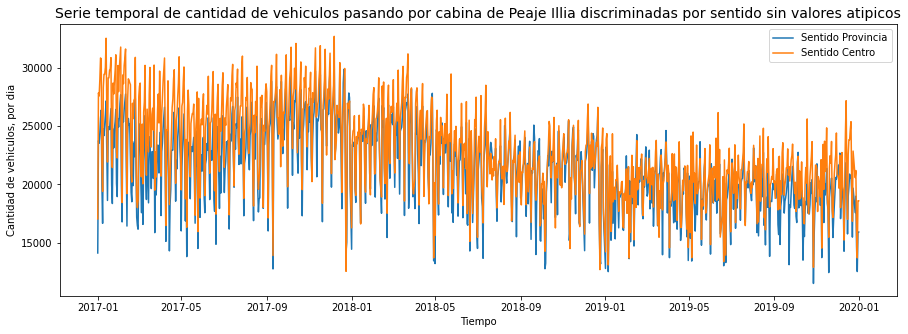

In [196]:
#Grafico la serie con sentidos

plt.figure(figsize = (15,5))
sns.lineplot(diario.index, diario.cantidad_sentido_provincia,label='Sentido Provincia',palette='bright')
sns.lineplot(diario.index, diario.cantidad_sentido_centro, label='Sentido Centro',palette='bright')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos, por dia')
plt.title('Serie temporal de cantidad de vehiculos pasando por cabina de Peaje Illia discriminadas por sentido sin valores atipicos', fontsize=14)
plt.show()

#### Tendencia


In [197]:
#Reviso Tendencia y resampleo los datos
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head(3)

(158, 3)


,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado
fecha,,,
2017-01-01,31183,14132,542
2017-01-08,347212,160248,17049
2017-01-15,366413,168540,17290


In [198]:
# Defino una ventana para hacer el metodo de ventana movil o rolling windows.
ventana = int(365/30) 
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
print('Tamaño de la serie de tendencia:', semanal_promedio_tendencia.shape)

Tamaño de la serie de tendencia: (158,)


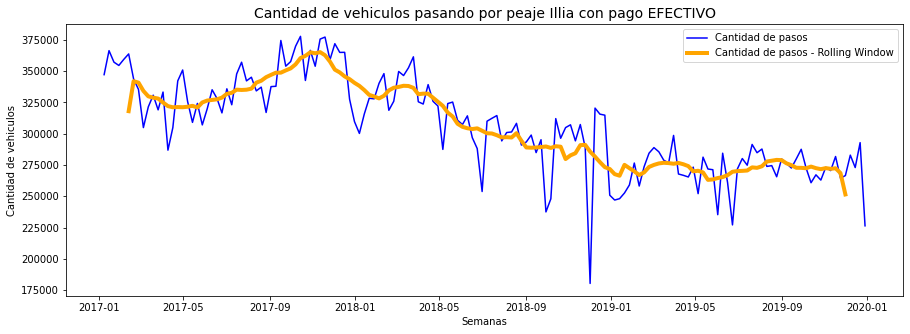

In [199]:
semanal.drop(semanal[semanal.index<='2017-01-01'].index,axis=0, inplace=True)
semanal.drop(semanal[semanal.index>='2020-01-01'].index,axis=0, inplace=True)
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de pasos', color='blue')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window', color='orange')
plt.xlabel('Semanas')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehiculos pasando por peaje Illia con pago EFECTIVO', fontsize=14)
plt.legend()
plt.show()

Se observa  que la tendencia de la serie decreo con el paso del tiempo. Esto confirma lo anteriormente anakizado. Puede afirmarse que ha cambiado la forma de pago, el pago en EFECTIVO aesta siendo reemplazado por medios digitales como son el TELEPASE en Argentina.

In [200]:
#Analisis tendencia diario

ventana = int(365/7)# Defino una ventana mayor que en el caso de semanal, para hacer el metodo de ventana movil o rolling windows. 
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
print('Tamaño de la serie de tendencia:', diario_promedio_tendencia.shape)

Tamaño de la serie de tendencia: (1095,)


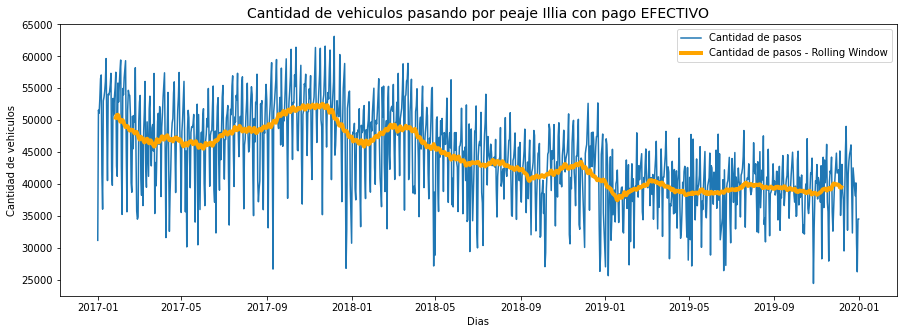

In [201]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window', color='orange')
plt.xlabel('Dias')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehiculos pasando por peaje Illia con pago EFECTIVO', fontsize=14)
plt.legend()
plt.show()


Se observa casi lo mismo que con la serie semanal. La tendencia muestra que se reduce el uso de pago en efectivo.

#### Stats Models 

Esta libreria realiza el analisis de la serie de forma "automatica" Las series en su modelo aditivo se componen de Tendencia + Estacionalidad + Residuo.

In [202]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

st = seasonal_decompose(diario.cantidad_pasos, model='additive')

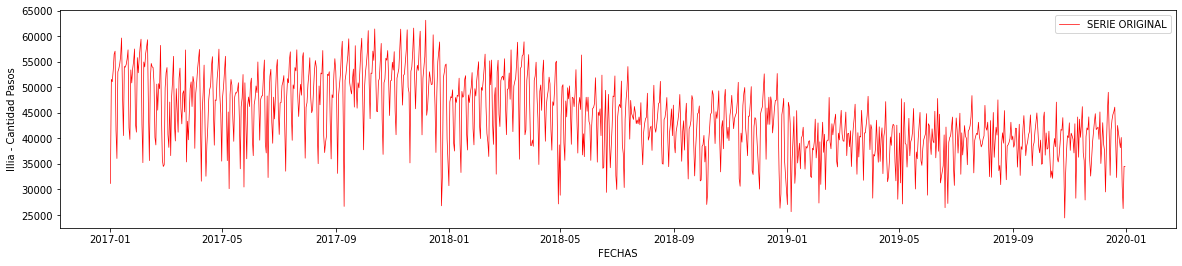

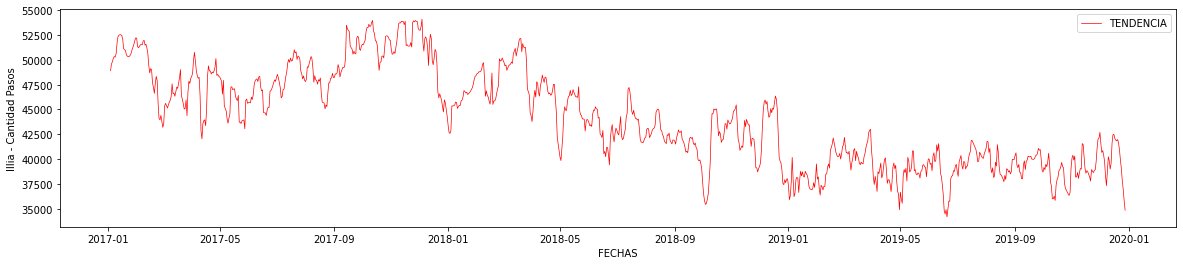

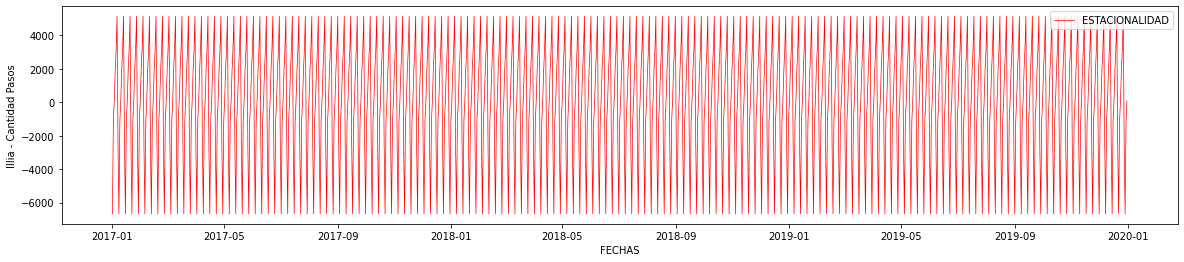

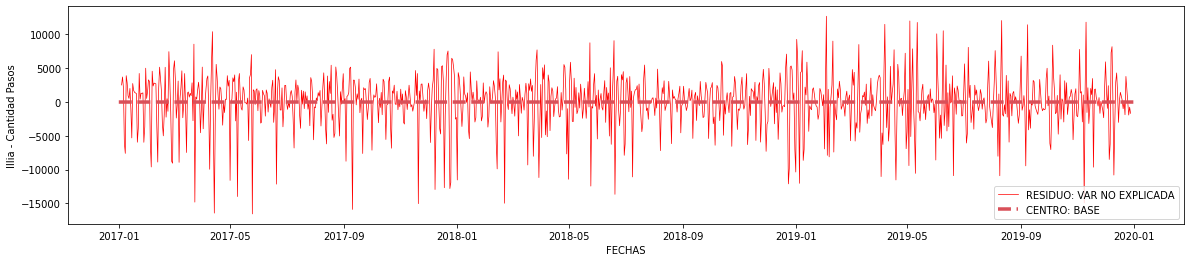

In [203]:
# Grafico
ancho, alto, grosor = 20,4, 0.7
#DD1155
#ED0000
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.observed.index, y=st.observed, color = 'red', lw=grosor, label= "SERIE ORIGINAL"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS"); plt.show()
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.trend.index, y=st.trend, color = 'red', lw=grosor, label= "TENDENCIA"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; plt.show()
plt.figure(figsize=(ancho,alto)); # #D95059
sns.lineplot(x=st.seasonal.index, y=st.seasonal, lw=grosor, color = 'red',label= "ESTACIONALIDAD"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; plt.show()
plt.figure(figsize=(ancho,alto)); 
sns.lineplot(x=st.resid.index, y=st.resid, lw=grosor, color = 'red', label= "RESIDUO: VAR NO EXPLICADA"); plt.ylabel("Illia - Cantidad Pasos"); plt.xlabel("FECHAS") ; 
# ver como se puede poner VARIABILIDAD NO EXPLICADA y colocar el label arriba a al derecha

sns.lineplot(x=st.resid.index, y=np.zeros(st.resid.shape[0]), ls='--', lw=3.5, color = '#D95059', label='CENTRO: BASE')
plt.show()

A continuacion estudio los residuos

1° Std Deviation:  3956.0
2° Std Deviation:  7913.0
3° Std Deviation:  11869.0


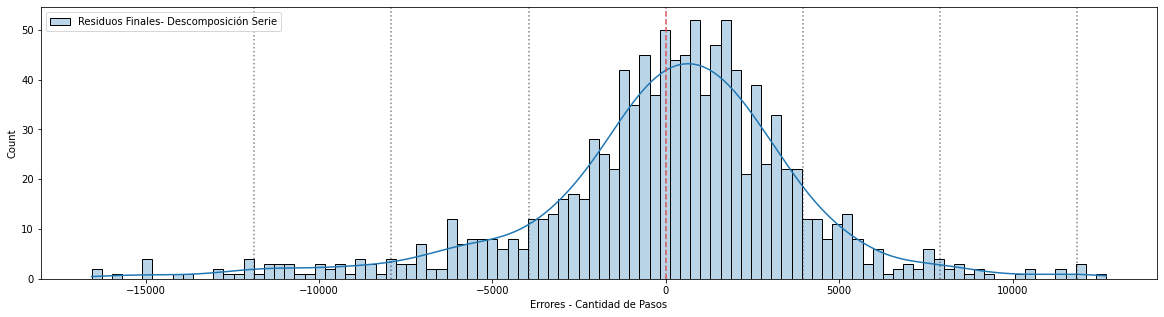

In [204]:
import seaborn as sns

dev=st.resid.std()
print("1° Std Deviation: ", np.around(dev))
print("2° Std Deviation: ", np.around(2*dev))
print("3° Std Deviation: ", np.around(3*dev))
#matplotlib.style.use('default')

label='Residuos Finales- Descomposición Serie'
plt.subplots(figsize=(20, 5))
sns.histplot(data=st.resid, bins=100, x=st.resid,label=label, kde=True, alpha=0.3);

# Ploteo desvíos estándar
plt.axvline(0, linestyle ='--', color= '#D95059') ; op=0.6
plt.axvline(dev, linestyle =':', color= '#2B2D42' , alpha=op )
plt.axvline(-dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(-2*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(2*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(-3*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.axvline(+3*dev, linestyle =':', color= '#2B2D42', alpha=op)
plt.xlabel('Errores - Cantidad de Pasos')
plt.legend();
#plt.xlim()

El analisis de residuos nos muestra que los errores se agrupan mayoritariamente alrededor del cero, como es esperable. A pesar de ello, notamos 2 cosas:

La cola de los negativos es mas pronunciada (aunque con poco volumen)

Por otro lado, existiría un volumen de observaciones mas alto en los primeros valores positivos (entre 0 y 4,000) que indicarían una ligera subestimación del modelo y del ajuste.

## Modelo de Machine Learning.

Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.

Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?

Pasos a realizar:

   - 1: Evaluar el comportamiento de la serie y sus componentes.
   - 2: Evaluar estacionariedad para poder predecir.
   - 3: Establecer un modelo Benchmark para poder comparar resultados.
   - 4: Predicción del último trimestre 2019 con Random Forest.
   - 5: Predicción del último trimestre 2019 con Prophet.

In [205]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
import scipy as sp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import numpy as np
import pandas as pd

###Modelo Benchmark###


Como Benchmark usare un modelo de predicción extremadamente simple que predice el valor siguiente a partir del valor actual. 
Luego realizare un modelo Random Forest y otro usando la librería Prophet y comparare los 3 modelos para definir cual es el que mejor predice.

In [206]:
#Hago split de datos
split_date = '2019-09-30'
diario_train = diario.loc[diario.index <= split_date].copy()
diario_test = diario.loc[diario.index > split_date].copy()
diario_train.head(3)

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
fecha,,,,,
2017-01-01,31183.0,14132.0,542.0,30641.0,17051.0
2017-01-02,51568.0,23743.0,2589.0,48979.0,27825.0
2017-01-03,51093.0,23526.0,2771.0,48322.0,27567.0


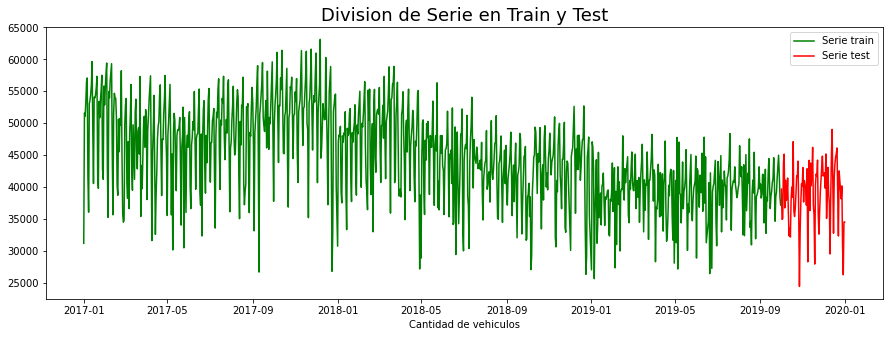

In [207]:
plt.figure(figsize= (15,5))
plt.plot(diario_train.cantidad_pasos, color='green',label='Serie train')
plt.plot(diario_test.cantidad_pasos, color='red', label='Serie test')
plt.xlabel('Dias')
plt.xlabel('Cantidad de vehiculos')
plt.title('Division de Serie en Train y Test', fontsize=18)
plt.legend()
plt.show()

Armo los set de datos para train y test del modelo. Ademas defino la ventana de tiempo look back que se usara para predecir el siguiente valor.

In [208]:
rmse_train=[]
rmse_test=[]
mape_test=[]
nombre_modelo=[]

#Cantidad de pasos que quiero predecir
senial1 = diario.cantidad_pasos

#Ventana look_back 
look_back = 120 # 120 corresponde a 4 meses
N = senial1.shape[0] # N es 1095 serian 365 dias x 3 años.

#Armo una variable vacia X (matriz) para luego guardar cada valor
#Armo una variable y que tendra los valores de la señal "cantidad de pasos" que quiero 
#entrenar y luego predecir
X1 = np.zeros((N - look_back -1,look_back))
y = np.zeros(N - look_back - 1)

#Con el ciclo for cargo los valores en la matriz X.
for i in range(X1.shape[0]):
    X1[i,:] = senial1.iloc[i:i+look_back]
    y[i] = senial1.iloc[i+look_back] 

#Defino los tamaños de cada set de datos para Train y para Test
N_train = ((1000)- look_back) # cantidad de instancias que vamos a usar para entrenar (2 años y 9 meses). 
N_test = 90 #cantidad de puntos (dias) que vamos a usar para evaluar (3 meses).
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Renombro X1
X=X1

#Imprimo el tamaño de X e y 
print('Tamaño X',X.shape,'Tamaño y', y.shape)

#Separo entre X_train e y_train e imprimo sus tamaños
X_train = X[:N_train,:]
y_train = y[:N_train]
print('Tamaño X_train',X_train.shape,'Tamaño y_train', y_train.shape)

#Separo entre X_test e y_test e imprimo sus tamaños
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print('Tamaño X_test',X_test.shape, 'Tamaño y_test',y_test.shape)

Tamaño X (974, 120) Tamaño y (974,)
Tamaño X_train (880, 120) Tamaño y_train (880,)
Tamaño X_test (90, 120) Tamaño y_test (90,)


Como *benchmark* utilizo el modelo más básico para predecir el valor futuro tomando el valor anterior inmediato.

In [209]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [210]:
y_train_pred_0 = y[0]
y_train_pred_benchmark_1 = y[0:N_train - 1]

In [211]:
y_train_pred_benchmark=np.concatenate(([y_train_pred_0.reshape(1,-1),y_train_pred_benchmark_1.reshape(1,-1)]),axis=1)

In [212]:
y_train_pred_benchmark_1.shape

(879,)

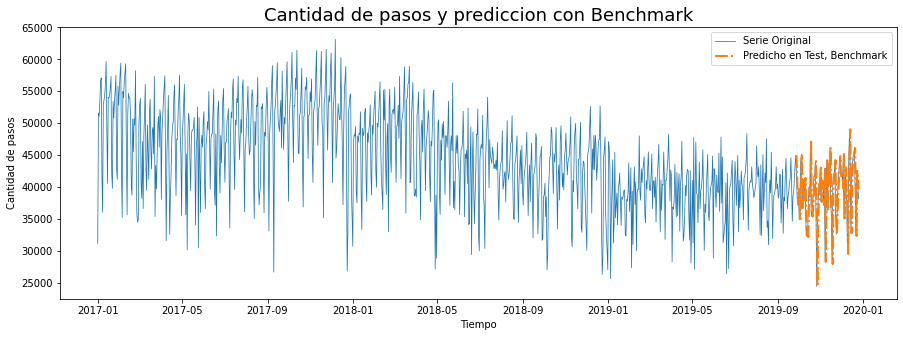

In [213]:
plt.figure(figsize=(15,5))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
#plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Cantidad de pasos y prediccion con Benchmark', fontsize=18)
plt.legend()
plt.show()

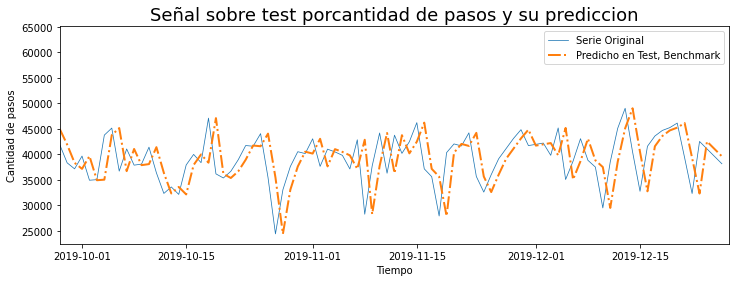

In [214]:

plt.figure(figsize=(12,4))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Señal sobre test porcantidad de pasos y su prediccion', fontsize=18)
plt.legend()
plt.show()

In [215]:
MSE_benchmark_train = mean_squared_error(y_train , y_train_pred_benchmark.reshape(-1,1))
print('Error RMSE en train',np.sqrt(MSE_benchmark_train))

y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE_benchmark_test = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print('Error RMSE en test',np.sqrt(MSE_benchmark_test))

Error RMSE en train 6873.513390504943
Error RMSE en test 5447.065952146811


In [216]:
rmse_train.append(np.sqrt(MSE_benchmark_train))
rmse_test.append(np.sqrt(MSE_benchmark_test))
nombre_modelo.append('Benchmark')

###Random Forest###

Voy a usar y evaluar un Random Forest Regressor para predecir los valores futuros de la serie. 

Al tratarse de una REGRESION selecciono la metrica RMSE ya que, por ser la raíz del error cuadrático medio entre las muestras reales y la predicción, estará en las mismas unidades que el valor a predecir o contra el que comparo. Por este motivo es un muy buen indicador, comprensible numéricamente, de cuan desplazada esta la predicción de la muestra real.

In [217]:
random_forest = RandomForestRegressor()

# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(100, 300),
              'max_depth': sp.stats.randint(2, 14),
              'max_features':['sqrt', 'log2', 'auto'], #,'auto'
              'min_samples_split':sp.stats.randint(2, 8),
              'min_samples_leaf':sp.stats.randint(2, 6)}

In [218]:
# Hago Random Search con cross validation
random_forest_random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, 
                           scoring='neg_mean_squared_error',n_jobs=3, cv=5)

In [219]:
#Entreno el modelo
random_forest_random_search.fit(X_train,np.ravel(y_train))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [220]:
#Mejores hiperparametros 
random_forest_random_search.best_params_

{'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 188}

In [221]:
#Predicciones para X_train y X_test
y_pred = random_forest_random_search.predict(X)
y_train_pred = random_forest_random_search.predict(X_train)
y_test_pred = random_forest_random_search.predict(X_test)

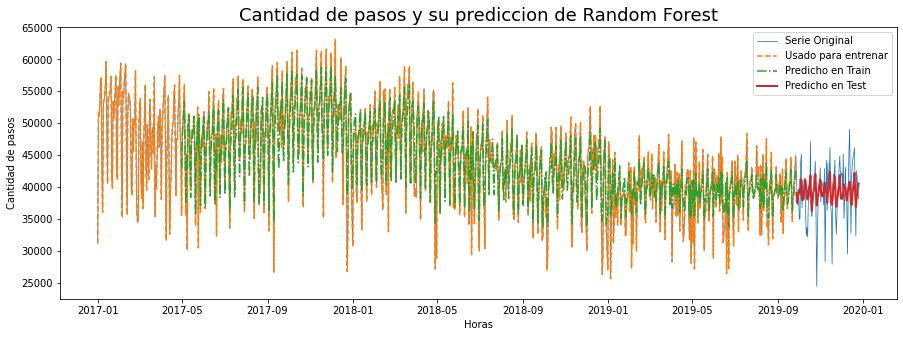

In [222]:
plt.figure(figsize=(15,5))
plt.plot(senial1.index[:length_total], senial1[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial1.index[:N_train + look_back], senial1[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial1.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial1.index[N_train+look_back: length_total], y_test_pred,'-', lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Horas')
plt.ylabel('Cantidad de pasos')
plt.title('Cantidad de pasos y su prediccion de Random Forest', fontsize=18)
plt.show()

In [223]:
#RMSE para comparar modelos
MSE_train_random_forest_1_variable = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train_random_forest_1_variable))

MSE_test_random_forest_1_variable = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test_random_forest_1_variable))

Error en Train: 2825.2494018663515
Error en Test: 3896.8269672730385


In [224]:
rmse_train.append(np.sqrt(MSE_train_random_forest_1_variable))
rmse_test.append(np.sqrt(MSE_test_random_forest_1_variable))
nombre_modelo.append('Random Forest con un feature')

###Prophet###
Analizo ahora un modelo con la librería Prophet. Esta está especialmente diseñada para análisis y predicciones con datos de series temporales.

Ademas de RMSE selecciono la métrica MAPE (Porcentaje del error absoluto medio) ya que me da una idea acabada del porcentaje de error absoluto que se comete en las predicciones. También confiere un resultado que puede ser interpretado fácilmente por el lector.

In [225]:
# Datos para usar con modelo prophet (ds e y)
diario_train.reset_index() \
    .rename(columns={'fecha':'ds',
                     'cantidad_pasos':'y'}).head()

,ds,y,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
0,2017-01-01,31183.0,14132.0,542.0,30641.0,17051.0
1,2017-01-02,51568.0,23743.0,2589.0,48979.0,27825.0
2,2017-01-03,51093.0,23526.0,2771.0,48322.0,27567.0
3,2017-01-04,53332.0,24383.0,2751.0,50581.0,28949.0
4,2017-01-05,56486.0,25666.0,2864.0,53622.0,30820.0


Grilla de parámetros que usare para evaluar y obtener el mejor modelo con hiperparametros optimizados por la metrica MAPE. Calculo la cantidad de combinaciones posibles que me produce la grilla de hiperparametros.

In [226]:
from fbprophet import Prophet
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.3,0.5],
              'n_changepoints' : [100,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1
print('Total de modelos posibles para evaluar:',cnt)

Total de modelos posibles para evaluar: 12


In [227]:
# Funcion que calcula el Porcentaje de error absoluto medio mape
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def cargo_metricas (mse_train, mse_test, mape_test, modelo):
    metricas=[np.sqrt(rmse_train), np.sqrt(rmse_test), mape_test, modelo]
    return metricas

In [228]:
import random

# Entreno modelos con combinacion de hiperparametros y evaluo cada uno el MAPE
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='AR')
    train_model.fit(diario_train.reset_index() \
              .rename(columns={'fecha':'ds',
                               'cantidad_pasos':'y'}))
    diario_train_fcst = train_model.predict(df=diario_train.reset_index() \
                                            .rename(columns={'fecha':'ds'}))
    diario_test_fcst = train_model.predict(df=diario_test.reset_index() \
                                           .rename(columns={'fecha':'ds'}))
    dif_error_test = np.square(diario_test_fcst.loc[:, 'yhat'] - diario_test.cantidad_pasos.values)
    MSE_prophet_test = np.mean(dif_error_test)
    rmse_test_prophet = np.sqrt(MSE_prophet_test)
    dif_error_train = np.square(diario_train_fcst.loc[:, 'yhat'] - diario_train.cantidad_pasos.values)
    MSE_prophet_train = np.mean(dif_error_train)
    rmse_train_prophet = np.sqrt(MSE_prophet_train)
    MAPE_prophet=mean_absolute_percentage_error(diario_test.cantidad_pasos,diario_test_fcst.yhat)
    print('** Mean Absolute Percentage Error(MAPE) = ',MAPE_prophet,'**','\n')
    model_parameters = model_parameters.append({'MAPE':MAPE_prophet,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  10.826805646782672 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  12.53680410478478 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  10.766300115194328 ** 

{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  12.51768916142665 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
** Mean Absolute Percentage Error(MAPE) =  9.308164468204126 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
** Mean Absolute Percentage Error(MAPE) =  11.838003827566208 ** 

{'changepoint_prior_scale': 0.3, 'n_changepoints': 200,

In [229]:
#Analizo cual fue la mejor combinacion que hace menor el error MAPE
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,9.308164,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
1,9.716194,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
2,10.353305,"{'changepoint_prior_scale': 0.5, 'n_changepoin..."
3,10.766300,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
4,10.826806,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."


In [230]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.3,
 'n_changepoints': 100,
 'seasonality_mode': 'multiplicative'}

In [231]:
#Defino y entreno nuevamente el modelo con los mejores hiperparametros encontrados.
model=Prophet(weekly_seasonality=True, daily_seasonality = False, yearly_seasonality = True,
              interval_width=0.95, changepoint_prior_scale=0.3,n_changepoints=100,  #n_changepoints=100
              seasonality_mode='multiplicative')
model.add_country_holidays(country_name='AR')

In [232]:
model.fit(diario_train.reset_index() \
          .rename(columns={'fecha':'ds',
                           'cantidad_pasos':'y'}))

In [233]:
#Realizo la prediccion con el modelo sobre el set de train y test
diario_test_fcst = model.predict(df=diario_test.reset_index() \
                                   .rename(columns={'fecha':'ds'}))
diario_train_fcst = model.predict(df=diario_train.reset_index() \
                                   .rename(columns={'fecha':'ds'}))

In [234]:
diario_test_fcst.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice],Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice]_lower,Día Nacional de la Memoria por la Verdad y la Justicia [Memory's National Day for the Truth and Justice]_upper,Día Nacional de la Soberanía [National Sovereignty Day],Día Nacional de la Soberanía [National Sovereignty Day]_lower,Día Nacional de la Soberanía [National Sovereignty Day]_upper,Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin],Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin]_lower,Día Pase a la Inmortalidad del General D. José de San Martin [Day Pass to the Immortality of General D. José de San Martin]_upper,Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano],Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano]_lower,Día Pase a la Inmortalidad del General D. Manuel Belgrano [Day Pass to the Immortality of General D. Manuel Belgrano]_upper,Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes],Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes]_lower,Día Pase a la Inmortalidad del General Martín Miguel de Güemes [Day Pass to the Immortality of General Martín Miguel de Güemes]_upper,Día de Carnaval [Carnival's Day],Día de Carnaval [Carnival's Day]_lower,Día de Carnaval [Carnival's Day]_upper,Día de Pascuas [Easter Day],Día de Pascuas [Easter Day]_lower,Día de Pascuas [Easter Day]_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de la Revolucion de Mayo [May Revolution Day],Día de la Revolucion de Mayo [May Revolution Day]_lower,Día de la Revolucion de Mayo [May Revolution Day]_upper,Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day],Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day]_lower,Día del Respeto a la Diversidad Cultural [Respect for Cultural Diversity Day]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War],Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War]_lower,Día del Veterano y de los Caidos en la Guerra de Malvinas [Veterans Day and the Fallen in the Malvinas War]_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Semana Santa (Jueves Santo) [Holy day (Holy Thursday)],Semana Santa (Jueves Santo) [Holy day (Holy Thursday)]_lower,Semana Santa (Jueves Santo) [Holy day (Holy Thursday)]_upper,Semana Santa (Viernes Santo) [Holy day (Holy Friday)],Semana Santa (Viernes Santo) [Holy day (Holy Friday)]_lower,Semana Santa (Viernes Santo) [Holy day (Holy Friday)]_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-10-01,39581.781516,33339.542681,48410.887369,39581.200022,39582.295123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

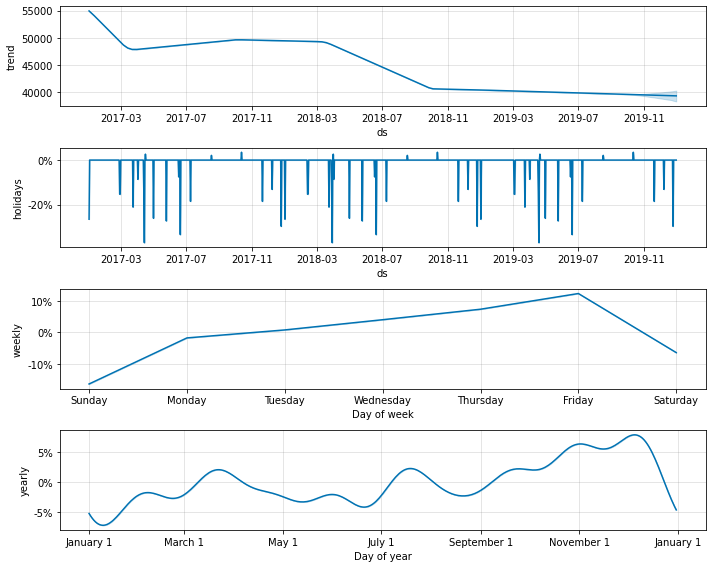

In [235]:
# Grafico
fig = model.plot_components(pd.concat([diario_train_fcst,diario_test_fcst]),figsize=(10,8))

Los graficos del modelo de Prophet, corroboran una tendencia decrecienteen el pago EfECTIVO de la serie a medida que transcurren los años.También se observa  que el día de la semana que más vehículos circulan es el Viernes y queen los meses de Noviembre y Diciembre se da el mayor tráfico con la modalidad de pago Efectivo.

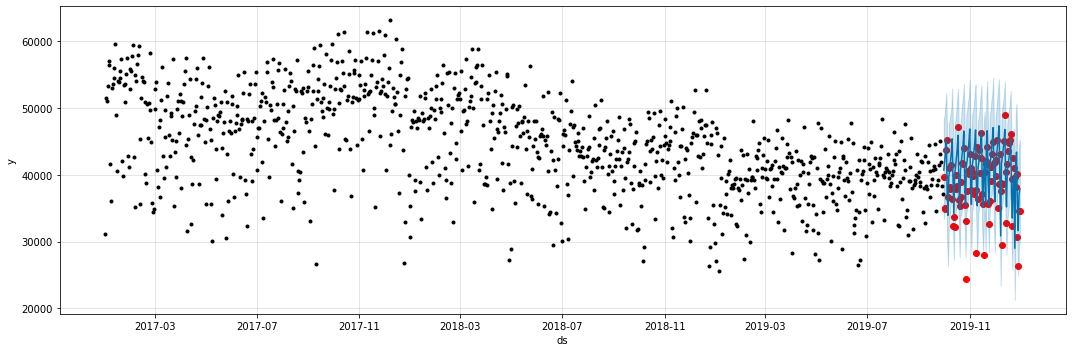

In [236]:
#Grafico la predicción realizada y los valores de set de test actual
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(diario_test.index, diario_test['cantidad_pasos'], color='r')
fig = model.plot(diario_test_fcst, ax=ax)

In [237]:
dif_error_test = np.square(diario_test_fcst.loc[:, 'yhat'] - diario_test.cantidad_pasos.values)
MSE_prophet_test = np.mean(dif_error_test)
rmse_test_prophet = np.sqrt(MSE_prophet_test)
dif_error_train = np.square(diario_train_fcst.loc[:, 'yhat'] - diario_train.cantidad_pasos.values)
MSE_prophet_train = np.mean(dif_error_train)
rmse_train_prophet = np.sqrt(MSE_prophet_train)

In [238]:
print('Error RMSE en train',rmse_train_prophet)
print('Error RMSE en test',rmse_test_prophet)

MAPE_prophet=mean_absolute_percentage_error(diario_test.cantidad_pasos,diario_test_fcst.yhat)
print('El porcentaje de error medio absoluto en test es: ',MAPE_prophet,'%')

Error RMSE en train 3689.7188207623053
Error RMSE en test 5089.169514645432
El porcentaje de error medio absoluto en test es:  10.901955985318141 %


In [239]:
rmse_train.append(rmse_train_prophet)
rmse_test.append(rmse_test_prophet)
mape_test.append(MAPE_prophet)
nombre_modelo.append('Prophet')

###Conclusion de Modelos###

In [240]:
nombre_modelo

['Benchmark', 'Random Forest con un feature', 'Prophet']

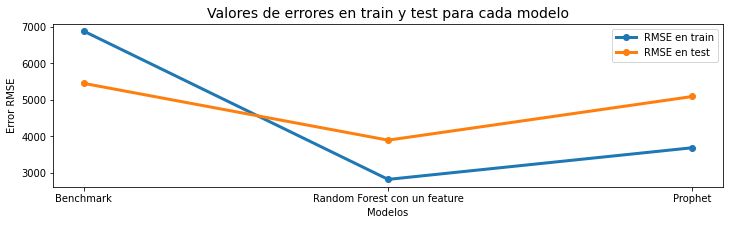

In [241]:
#Gráfico que compare sus errores en los set de train y test entre modelos.
plt.figure(figsize=(12,3))
plt.plot(nombre_modelo,rmse_train, '-o',label='RMSE en train',linewidth=3)
plt.plot(nombre_modelo,rmse_test, '-o',label='RMSE en test',linewidth=3)
plt.xlabel('Modelos')
plt.ylabel('Error RMSE')
plt.title('Valores de errores en train y test para cada modelo', fontsize=14)
plt.legend()
plt.show()

Del grafico se observa que el modelo que mejor funciona es el Random Forest. Este modelo lo entrene con la serie original cantidad de pasos.

El modelo que aparece con menor overfitting es el modelo  Prophet (errores entre train y test más próximos), pero los errores RMSE train y test, son más altos que con Random Forest.

Como modelo con mejor performance es el Random Forest con 1 feature ya que tiene menor requerimiento en computos, mas simple y mejores resultados. Si bien hay que destacar que esta montado sobre una serie bastante simple.

###Predicciones###

#### Prediccion 2020 con Random Forest

In [242]:
y_ms_test_pred = []
print('El tamaño del set de test es:',X_test.shape)
print('La ultima instancia del set de test es la posicion:',X_test.shape[0])
#print('Los valores de la ultima instancia del set de test son:')
#print(X_test[(X_test.shape[0]-1),:])
x = X_test[X_test.shape[0]-1,:] # arrancamos con la ultima instancias del conjunto de test

El tamaño del set de test es: (90, 120)
La ultima instancia del set de test es la posicion: 90


In [243]:
# Prediccion de los valores siguientes observando los últimos días del año 2019 para predecir de a uno los valores de 2020

for i in np.arange(1,32,1):
    y_os_pred = random_forest_random_search.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [244]:
dates_m = pd.date_range('20200101', periods=31, freq='D')
df=pd.DataFrame()
df['fecha']=dates_m
df['y']=y_ms_test_pred
print('Tamaño del dataset:',df.shape)
df.head()

Tamaño del dataset: (31, 2)


,fecha,y
0,2020-01-01,40556.046706
1,2020-01-02,42048.255576
2,2020-01-03,39304.779511
3,2020-01-04,37345.752869
4,2020-01-05,38622.455720


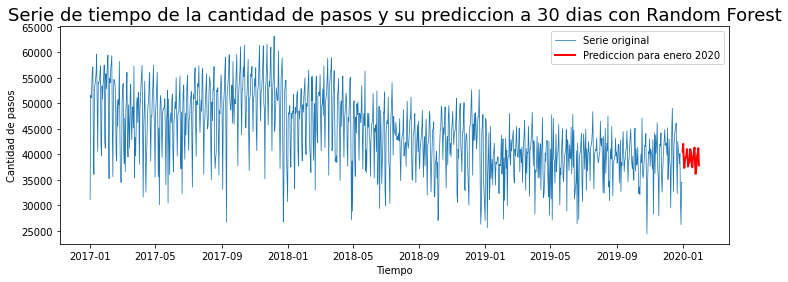

In [245]:
plt.figure(figsize=(12,4))
plt.plot(senial1.index, senial1,lw = 0.75, label = 'Serie original')
plt.plot(df.fecha, df.y,'-', lw = 2, label = 'Prediccion para enero 2020', color='red')
#plt.xlim(senial1.index[N_train+look_back], senial1.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.title('Serie de tiempo de la cantidad de pasos y su prediccion a 30 dias con Random Forest', fontsize=18)
plt.legend()
plt.show()

La predicción con este modelo conserva la variabilidad de las serie en la prediccion del modelo.

####Prediccion 2020 con Prophet

In [246]:
#Set de datos para predecir a futuro todo el año 2020.

future = model.make_future_dataframe(periods=432, freq='D')
forecast = model.predict(future)

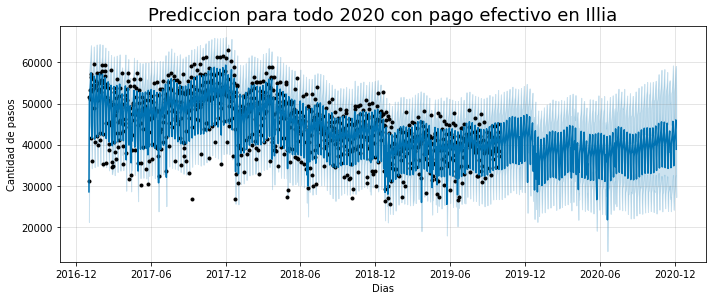

In [247]:
fig = model.plot(forecast,uncertainty=True, plot_cap=False,xlabel='Dias', ylabel='Cantidad de pasos',figsize=(10, 4))
plt.title('Prediccion para todo 2020 con pago efectivo en Illia', fontsize=18)
plt.show()

En esta grafica de Prophet Prediction se ve que hay una pendiente positiva hacia el fin de 2020. 
Claramente no contemplo el año atípico de la pandemia COVID-19. Se evidencia que los modelos no contemplan una situación fuera de la logica y atípica como la que se vivio en 2020 y se afirma que es imposible pronosticar la cantidad de vehículos que pasaran por una cabina de peaje. Ademas toda logica indicaria que el metodo de pago  EFECTIVO seguiria decayendo hasta casi desaparecer.

Queda en evidencia que el modelo no se ajusta a la realidad con la predicció ya que, logicamente, no contempló la cuarentena que se dio desde marzo de 2020 por 6 meses en Argentina.

## Investigación

Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.), debes mencionarlas.

Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.

https://www.tensorflow.org/tutorials/structured_data/time_series

https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237

Luego de leer y profundizar sobre el tema, a modo de investigación me propongo invetigar, diseñar y evaluar una red neuronal para poder predecir los valores futuros de esta serie. Me veo planteando este tipo de modelo para poder compararlo con las predicciones obtenidas en este proyecto. vere si uso Tensorflow o Keras.

Los resultados que espero encontrar no van a ser alentadores, porque es practicamente imposible que el algoritmo prediga la pandemia del COVID-19 que yo, entregando este proyecto tarde, se comoavanzo durante el 2020 y 2021.

Dejo el link de este proyecto en Github.

https://github.com/tomas655/Proyectos-ACAMICA/blob/master/tomas_de_anchorena_DS_Proyecto_03_ST_final.ipynb


# Continuacion de proyecto 3 Series de Tiempo

In [248]:
#Importo las librerias a utilizar

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.regularizers import L1L2
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

## Tratamiento de dataset

Comenzare acondicionando la data para entrenar y evaluar una Red Neuronal LSTM (Long short-term memory) que luego comparare con el regresor Random Forest, usando la metrica RMSE ya que es comprensible numéricamente y nos muestra que tan desplazada se encuentra la predicción de la muestra real.


In [249]:
#Imprimo los primeros registros del dataset

diario.head()

,cantidad_pasos,cantidad_sentido_provincia,cantidad_pesado,cantidad_liviano,cantidad_sentido_centro
fecha,,,,,
2017-01-01,31183.0,14132.0,542.0,30641.0,17051.0
2017-01-02,51568.0,23743.0,2589.0,48979.0,27825.0
2017-01-03,51093.0,23526.0,2771.0,48322.0,27567.0
2017-01-04,53332.0,24383.0,2751.0,50581.0,28949.0
2017-01-05,56486.0,25666.0,2864.0,53622.0,30820.0


In [250]:
# Escalo los datos entre 0 y 1 para que puedan ser ingresados a la Red Neuronal.

diario_escalado=diario.drop(['cantidad_sentido_provincia','cantidad_pesado','cantidad_liviano','cantidad_sentido_centro'], axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
diario_escalado['cantidad_pasos_reescalados']=scaler.fit_transform(diario_escalado)

In [251]:
#Tomo una ventana de 120 días para evaluar el siguiente valor de predicción. Igual al que use para el entrenamiento del Random Forest.

#Cantidad de pasos que quiero predecir
senial1 = diario_escalado.cantidad_pasos_reescalados

#Ventana look_back para predecir el valor futuro
look_back = 120 # usamos 120 valores para predecir el siguiente numero de pasos (4 meses)
N = senial1.shape[0] # N es 1095 serian 365 dias x 3 años.

#X1 es una matriz vacia para guardar cada valor
#Armo variable que tendra la cantidad de pasos que quiero entrenar y predecir
X1 = np.zeros((N - look_back -1,look_back))
y = np.zeros(N - look_back - 1)

#Cargo los valores en la matriz X1.
for i in range(X1.shape[0]):
    X1[i,:] = senial1.iloc[i:i+look_back]
    y[i] = senial1.iloc[i+look_back]  
    
#Tamaños de cada set para Train y para Test
N_train = ((1000)- look_back) # instancias que uso para train (2 años y 9 meses). 
N_test = 90 # Dias que vuso para test (3 meses).
N_total = N_train + N_test

length_total = N_train + N_test + look_back

#Renombro X1
X=X1

#Imprimo tamaño de X e y 
print('Tamaño X',X.shape,'Tamaño y', y.shape)

#Separo X_train e y_train e imprimo tamaños
X_train = X[:N_train,:]
y_train = y[:N_train]
print('Tamaño X_train',X_train.shape,'Tamaño y_train', y_train.shape)

#Separo X_test e y_test e imprimo tamaños
X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print('Tamaño X_test',X_test.shape, 'Tamaño y_test',y_test.shape)

Tamaño X (974, 120) Tamaño y (974,)
Tamaño X_train (880, 120) Tamaño y_train (880,)
Tamaño X_test (90, 120) Tamaño y_test (90,)


In [252]:
#Remodelo las dimensiones de x e y para poder ingresarlas a la Red Neuronal.

X_train=X_train.reshape(880,120,1)
X_test=X_test.reshape(90,120,1)
y_train=y_train.reshape(880,1)
y_test=y_test.reshape(90,1)
print('El tamaño de x_train es:',X_train.shape)
print('El tamaño de x_test es:',X_test.shape)
print('El tamaño de y_train es:',y_train.shape)
print('El tamaño de x_train es:',y_test.shape)

El tamaño de x_train es: (880, 120, 1)
El tamaño de x_test es: (90, 120, 1)
El tamaño de y_train es: (880, 1)
El tamaño de x_train es: (90, 1)



##Modelo de Red Neuronal LSTM. 

Al modelo lo armare con un stack de 2 redes LSTM interconectadas y usare una capa "densa" de 30 neuronas para poder interfasear entre la salida de la 2da LSTM y la densa final de 1 neurona así cuando se realice la prediction tendré el resultado absoluto con valores entre 0 y 1. Estas predicciones las tendré que escalar con el escalador usado antes del entrenamiento para poder obtener las predicciones definitivas "leibles".

###Hiperparametros de las 2 capas LSTM

Definición

*units* (1ra capa 50 neuronas y 2da capa 70 neuronas)

*activation*="tanh" Activación por defecto con función Tangente hiperbólica.

*return_sequences*=True (Devuelve la última secuencia en la salida)

*unroll*=True (le avisa a la capa que tiene que conectar con la siguiente capa LSTM)

Compilación

*loss*='mean_squared_error' (Metrica de evaluación MSE. Función de costo)

*optimizer*=Adam (Adaptive moment estimation, Optimizador de los pesos evaluando la función de costo que se quiere minimizar.

Entrenamiento

*epochs*=120 (Recorrido de entrenamiento completo por todo el conjunto de datos de train).

*batch*_size=64 (Cantidad de instancias del set de datos de train que pasaran por cada iteración para entrenar y actualizar los mejores pesos que buscan minimizar la función de costos. El descubrimiento de estos pesos se lleva a cabo mediante un algoritmo numérico llamado backpropagation.

In [253]:
# Modelo

model = Sequential()
model.add(LSTM(50,batch_input_shape=(None, 120, 1), stateful=False, return_sequences=True, unroll=True))  # 1ra capa LSTM con unroll=True para conectar con la siguinte capa LSTM
model.add(LSTM(70,stateful=False, unroll=True))                                                           # Dimensiones
model.add(Dense(30, activation='relu'))                                                                   # Capa Densa para interfacear entre la capa LSTM y la neurona de salida
model.add(Dense(1))                                                                                       # Ultima capa Densa de 1 neurona donde se extrae el valor de prediccion.
opt_adam = optimizers.Adam(clipvalue=0.5)                                                                 # Hace que descarte valores por encima del clipvalue asi puede converger el gradiente
model.compile(loss='mean_squared_error', optimizer=opt_adam)                                              # Compilo el modelo con el optimizador Adam con clipvalue=0.5
model.reset_states()
history=model.fit(X_train, y_train.reshape(-1,1), epochs=120, batch_size=64, verbose=1, 
                  shuffle=True,validation_data=(X_test, y_test))

#Prueba del modelo con regularizacion con kernel_regularizer=L1L2(l1=0.01, l2=0.01) y arribe a peor performance en RMSE

Epoch 1/120
14/14 [==============================] - 41s 496ms/step - loss: 0.0689 - val_loss: 0.0156
Epoch 2/120
14/14 [==============================] - 2s 117ms/step - loss: 0.0260 - val_loss: 0.0150
Epoch 3/120
14/14 [==============================] - 2s 119ms/step - loss: 0.0243 - val_loss: 0.0161
Epoch 4/120
14/14 [==============================] - 2s 117ms/step - loss: 0.0236 - val_loss: 0.0161
Epoch 5/120
14/14 [==============================] - 2s 116ms/step - loss: 0.0231 - val_loss: 0.0149
Epoch 6/120
14/14 [==============================] - 2s 117ms/step - loss: 0.0228 - val_loss: 0.0141
Epoch 7/120
14/14 [==============================] - 2s 117ms/step - loss: 0.0230 - val_loss: 0.0153
Epoch 8/120
14/14 [==============================] - 2s 121ms/step - loss: 0.0234 - val_loss: 0.0148
Epoch 9/120
14/14 [==============================] - 2s 126ms/step - loss: 0.0231 - val_loss: 0.0142
Epoch 10/120
14/14 [==============================] - 2s 117ms/step - loss: 0.0227 - val_l

In [254]:
# Predicciones para train y test. El resultado deberá estar escalado entre 0 y 1.

prediccion_train=model.predict(X_train, batch_size=1, verbose=1)
prediccion_test=model.predict(X_test, batch_size=1, verbose=1)

90/90 [==============================] - 1s 6ms/step


In [255]:
#Ejecuto la transformación inversa para escalar al valor real.

prediccion_train_escalado=scaler.inverse_transform(prediccion_train)
prediccion_test_escalado=scaler.inverse_transform(prediccion_test)

In [256]:
#Analizo el tamaño de los vectores de las predicciones.

print('El tamaño sin escalado',prediccion_train.shape)
print('El tamaño escalado',prediccion_train_escalado.shape)

El tamaño sin escalado (880, 1)
El tamaño escalado (880, 1)



A continuacion defino los dataset de fechas para su prediccion de train y test.

Train sera de 880 dias a partir del 01-05-2017

Test sera de 90 dias a partir del 01-10-2019

In [257]:
dates_m = pd.date_range('20170501', periods=880, freq='D')
df_train=pd.DataFrame()
df_train['fecha']=dates_m
df_train['y']=prediccion_train_escalado
print('Tamaño del dataset:',df_train.shape)
df_train.head()

Tamaño del dataset: (880, 2)


,fecha,y
0,2017-05-01,47525.750000
1,2017-05-02,47874.039062
2,2017-05-03,50039.027344
3,2017-05-04,51573.261719
4,2017-05-05,53920.750000


In [258]:
dates_m = pd.date_range('20191001', periods=90, freq='D')
df=pd.DataFrame()
df['fecha']=dates_m
df['y']=prediccion_test_escalado
print('Tamaño del dataset:',df.shape)
df.head()

Tamaño del dataset: (90, 2)


,fecha,y
0,2019-10-01,39958.656250
1,2019-10-02,37173.785156
2,2019-10-03,39320.121094
3,2019-10-04,40525.453125
4,2019-10-05,40682.082031


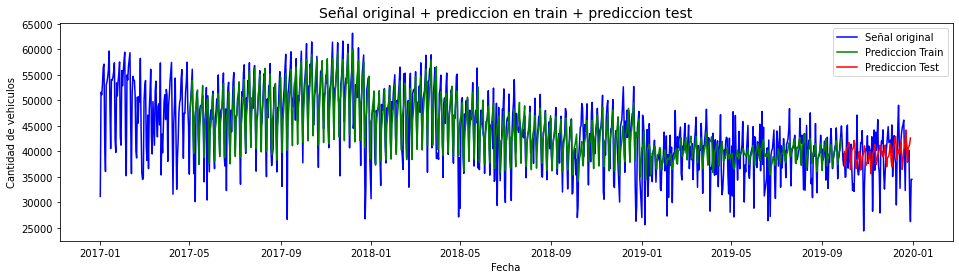

In [259]:
# Grafico las series de tiempo Original + predicción train + predicción test superpuestas.

plt.figure(figsize=(16,4))
plt.plot(diario.cantidad_pasos,label='Señal original',color='b')
plt.plot(df_train.fecha,df_train.y,label='Prediccion Train',color='green')
plt.plot(df.fecha,df.y,label='Prediccion Test',color='red')
plt.title('Señal original + prediccion en train + prediccion test', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.show()


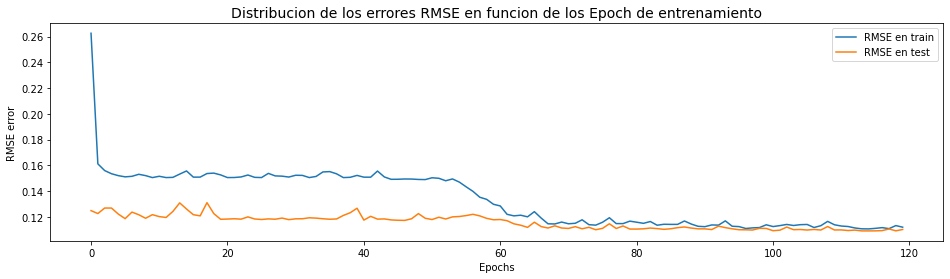

In [260]:
# Grafico la distribución de errores RMSE en función de los epoch corridos en el train de la LSTM.

plt.figure(figsize=(16,4))
plt.plot(np.sqrt(history.history['loss']), label='RMSE en train')
plt.plot(np.sqrt(history.history['val_loss']), label='RMSE en test')
plt.title('Distribucion de los errores RMSE en funcion de los Epoch de entrenamiento', fontsize=14)
plt.ylabel('RMSE error')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Onservo que el comportamiento de los errores RMSE en train y test a medida que transcurren los epochs de los datos, ambos valores convergen entre si, por lo tanto parece que esta bien entrenada.

In [261]:
MSE_train_LSTM = mean_squared_error(scaler.inverse_transform(y_train), prediccion_train_escalado)
print('Error en Train:',np.sqrt(MSE_train_LSTM))
MSE_test_LSTM = mean_squared_error(scaler.inverse_transform(y_test), prediccion_test_escalado)
print('Error en Test:',np.sqrt(MSE_test_LSTM))

Error en Train: 4244.4179651714685
Error en Test: 4267.08006080798


Los valores RMSE son próximos, es decir, no pareceria haber sesgo de overfitting ni underfitting. Tambien son similares a los modelos que ya venia probando como el Random Forest.

In [262]:
# Sumo el modelo a la lista de modelos para graficar

rmse_train.append(np.sqrt(MSE_train_LSTM))
rmse_test.append(np.sqrt(MSE_test_LSTM))
nombre_modelo.append('Red Neuronal LSTM')

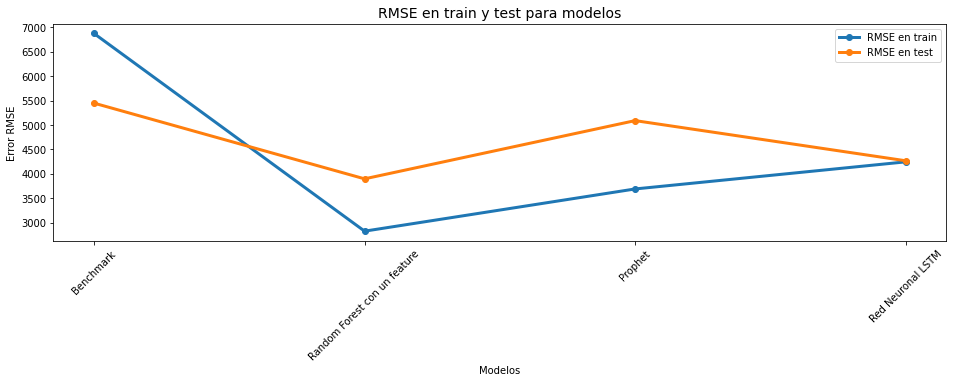

In [263]:
# Grafico la distribución de RMSE en train y test para los modelos ejecutados.

plt.figure(figsize=(16,4))
plt.plot(nombre_modelo,rmse_train, '-o',label='RMSE en train',linewidth=3)
plt.plot(nombre_modelo,rmse_test, '-o',label='RMSE en test',linewidth=3)
plt.xlabel('Modelos')
plt.xticks(rotation = 45)
plt.ylabel('Error RMSE')
plt.title('RMSE en train y test para modelos', fontsize=14)
plt.legend()
plt.show()

Se observa que la distubucion de los errores RMSE train y test por cada modelo evaluado. Veo que el modelo que mejor ajusta los errores y podrá generalizar para nuevos datos es la red LSTM y en menor medida el modelo Prophet (mas error RMSE relativo entre train y test, y mayor RMSE en test).

###Análisis de modelo Red Neuronal LSTM

1-Se observa que no hubo mejora en el RMSE del test respecto al Random Forest del Proyeto 3 .

2-Este modelo LSTM requirio un mayor tiempo de computo para train y test que el resto de los modelos del Proyecto 3. Ademas, no hubo una mejora en las predicciones evaluadas con RMSE entre los modelos.

3-La Red Neuronal LSTM obtuvo un balance entre los valores de train y test,es decir, no tiene ni overfitting ni underfitting. El Random Forest muestra overfitting, ya que las predicciones en train tienen un RMSE más bajo que el RMSE en test y eso demuestra que no generaliza correctamente.

Concluyo que la red neuronal LSTM obtuvo muy buenas medtricas RMSE tanto en test como en train. Veo que, aunque sea un modelo simple de Red neuronal, es robusto y puede generalizar corresctamente sobre cualquier dataset nuevo.




###Predicción para 2020 con Red Neuronal LSTM

Preparo los datos para iniciar la predicción a partir de la última ventana de 120 días del set de test, para inferir el siguiente valor que será el primer día 01 enero de 2020. Luego, la ventana se ira corriendo para predecir el siguiente valor, 02 enero de 2020, incluyendo la predicción anterior. Esto lo hare con un ciclo for hasta llegar al final de diciembre de 2020.

In [264]:

y_ms_test_pred = []
print('El tamaño del set de test es:',X_test.shape)
print('La ultima instancia del set de test es la posicion:',X_test.shape[0])
print('El tamaño de la ultima instancia del set de test son:')
#print(X_test_mas_features [(X_test_mas_features.shape[0]-1),:])
x = X_test[89,:,:]              # Arranco con la ultima instancia de test
x=x.reshape(1,120,1)
x.shape

El tamaño del set de test es: (90, 120, 1)
La ultima instancia del set de test es la posicion: 90
El tamaño de la ultima instancia del set de test son:


(1, 120, 1)

In [265]:
# Creo un for que serán 365 predicciones moviendo una window de 120 días.

for i in np.arange(1,366,1):
    y_os_pred = model.predict(x,batch_size=1, verbose=0)
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[0,1:,-1], y_os_pred.reshape(-1,1,1))
    x=x.reshape(1,120,1)
y_ms_test_pred = np.array(y_ms_test_pred)

In [266]:
# Chequeo el tamaño de la predicción. Debe dar 365 predicciones entre 01 enero 2020 y 31 diciembre 2020.

y_ms_test_pred.shape

(365, 1, 1)

In [267]:
# Realizo la transformación inversa de las predicciones para armar los dataset y poder graficar.

prediccion_2020_escalado=scaler.inverse_transform(y_ms_test_pred.reshape(365,-1))

In [268]:
#Genero el dataset de fechas y predicciones.

dates_m = pd.date_range('20200101', periods=365, freq='D') #freq='D'
df_2020=pd.DataFrame()
df_2020['fecha']=dates_m
df_2020['y']=prediccion_2020_escalado
print('Tamaño del dataset:',df_2020.shape)
df.head()

Tamaño del dataset: (365, 2)


,fecha,y
0,2019-10-01,39958.656250
1,2019-10-02,37173.785156
2,2019-10-03,39320.121094
3,2019-10-04,40525.453125
4,2019-10-05,40682.082031


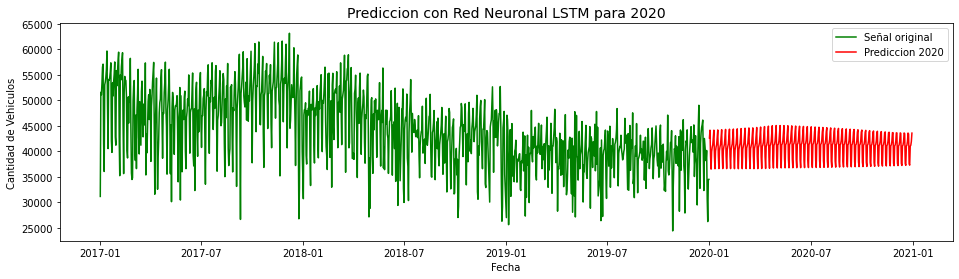

In [269]:
#Grafico la serie de tiempo original y la predicción para el año 2020.

plt.figure(figsize=(16,4))
plt.plot(diario.cantidad_pasos,label='Señal original',color='green')
plt.plot(df_2020.fecha, df_2020.y,label='Prediccion 2020',color='red')
plt.title('Prediccion con Red Neuronal LSTM para 2020', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Vehiculos')
plt.legend()
plt.show()

Al analizar el grafico se observa que el modelo tiende a mantener igual la prediccion en el transcurso del tiempo. Ademas la realidad de lo que fue el 2020 no condice con el comportamiento que el modelo predice. Tanto este modelo como los anteriores (Random Forest y Prophet) no pudieronas predecir la realidad de lo transcurrido durante el 2020.

A raiz de la pandemia de Sars COVID-19 ha resultado que casi cualquier predicción para 2020 no se ajuste a la realidad vivida. Ademas la pandemia generará un comportamiento atípico en las estadísticas y se deberá tratar con especial trato para los modelos que trabajan con series de tiempo.

### Conclusion final

Elegi probar un una Red Neuronal LSTM, que es una Red Neuronal recurrente. Son genralmente usadas para análisis de series de tiempo ya que poseen "memoria" a corto y largo plazo que sirve para las predicciones temporales.

Como continuacion a la pregunta generada en el Proyecto 3, si bien la red neuronal LSTM no mejoro la metrica RMSE, con respecto a la mejor performance del Proyecto anterior, tampoco fue peor pero hubo una mejora en el equilibrio de errores de las predicciones entre Train y Test. El modelo RN LSTM, a diferencia los evaluados en el Proyecto N°3 (Benchmark, Random Forest y Prophet) es más robusto y generaliza mejor.

El modelo puede generalizar sobre cualquier dataset no conocido por lo tanto sostengo que la Red Neuronal LSTM es el modelo mas equilibrado ya que no over/under fittea.

Como punto negativo a tener en cuenta, la red neuronal demanda mayor cantidad de cómputo y demora mas tiempo que el Random Forest.

Como ideas de mejora, para obtener un RMSE mas bajo sería mejor tener un dataset con más datos porque las redes neuronales mejoran al tener un volumen de datos grande para entrenar y por consiguiente haría disminuir el error.

A modo de conclusión selecciono el modelo LSTM como el mejor a mi parecer, ya que es el modelo mas robusto y aseguro que está bienrquilibrado sin overfitting y underfitting a diferencia del Random Forest que posee overfitting como los anteriormente analizados .

Github link

